Final Project

Dependency Parsing

Mary E. Rodgers


# Introduction

At three years old, children should have around 1000  words [1]. However, children diagnosed with autism spectrum disorder (ASD) acquire language at a lower rate than their peers. When assessing the language development of a child, both on and off the spectrum, several measures can be used. Previous research has focused on less reliable outcomes such as the mean length of utterance [2], but a new focus has been on the number of nominal subjects in active declarative sentences. Current research indicates that the number of diverse nouns in the subject position (i.e., nominal subjects) a caregiver models for their child may have a positive effect on number of words that a child acquires during early language acquisition [2, 3].

In this paper, dependency parsing will be used to calculate the number of nominal subjects used by caregivers during play-based interactions with their toddlers with autism. The dependencies will be parsed using SpaCY, an open-sourced Python library for natural language processing (NLP) [4].

The primary research question of this paper are
1. What is the correlation between the number of nominal subjects modeled by caregivers and the child's number of different words at baseline?

2. What is the correlation between the number of nominal subjects modeled by caregivers at post-testing and the child's number of different words at follow-up, and by group?

3. Is there a significant difference in the number of nominal subjects for the TX and BAU caregiver groups at post-test?

# Method

## Corpus

The body of texts, or corpus, for this research paper are the transcripts between caregivers playing with their toddlers (a Child-Caregvier Interaction (CCX) with autism from a previously completed research study [2] that took place at Vanderbilt and Northwestern University. In this longitudional randomized clinical trial (RCT), caregivers of toddlers with ASD were randomized equally into the treatment (TX) or business as usual (BAU) condition. All caregivers consented into the study received developmental information about their child and payment for their participation. Caregivers in the TX group also had a therapist train them in using Enhanced Milieu Teaching (EMT), a naturalistic language intervention strategy, with their child. During the CCX, caregivers were instructed to play with their child as they typically would for 10 minutes. The CCX was filmed and later transcribed by research team members naive to the randomization of the participating dyad. A CCX was collected at pre-, post-, and follow-up testing. All available CCX transcripts were used in the analysis.

The CCX transcripts were imported in as .txt files from their native software, Systematic Analysis of Language Transcripts (SALT) [6]. This resulted in 301 transcripts, with 113 from pre-test (T00), 101 from post-test (T01), and 87 from follow-up (T02).

The SALT transcripts were cleaned using regular expression [7] and pandas [8] in a previous round of analysis. The currently body of work included additional data cleaning using pandas to convert the SALT transcription conventions into text that could be analyzed by SpaCy.

## Dependency Parsing in the Roberts et al. (2022) Corpus

In Google Colab [9], python code [10] was used with SpaCY [5] to identify the number of nominal subjects caregivers used at all assessment time points. The nominal subjects were the predictor variable for a previously hand-coded child outcome in the original study, number of different words (NDW).

## Statistical Analysis

In Google Colab [9] a correlation were run between the number of nouns caregivers used at post-testing and the number of different words children had at follow-up testing for all group (all, BAU, TX). Additionally, a two-sample t- test was used assess the mean difference in the number of nominal subjects used by each group at post-test.

# NLP Analysis

The steps taken in this NLP analysis included:
(1) Accessing and cleaning the CCX transcripts in Google Colab [9] using Regular Expression [7] and pandas [8];
(2) Using SpaCy [5] to parse the nominal subjects by group (TX or BAU); (3) appending the SpaCy results to pandas [8] dataframe and exporting the dataframe; and (4) statistically analzing the nominal subject dependencies for significance in regards to treatment condition.

## Github

All publicaly available code will be stored on [Github](https://github.com/Mary-E-Rodgers/NLP-Analysis-using-SpaCy---Dependency-Parsing) [11].

The transcripts used in this analysis will not be made availabe.

Please contact the author with any questions:

>mary.e.rodgers@vanderbilt.edu















## Step 1: Accessing and cleaning the transcripts
Allow Google colab to access the data you have on your Google Drive, and map the directory location of your data.

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from google.colab import drive # this imports Google Drive (Drive) into Google Colab (Colab)

drive.mount('/content/drive') # this mounts Drive into Colab

!ls "/content/drive/My Drive" # this shows the content on your Drive

import os # this package deciphers which operating system you are using

os.chdir("/content/drive/MyDrive/Professional/4_PhD/Classes/9_Fall_2023/SPED7500_ComputationalLanguageAnalysis/Assignments/FinalProject") # this is where you change the directory to where your data is located on Drive

os.listdir() #this lists what you now have available

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Personal  Professional


['Rodgers_FinalProject.ipynb',
 'Final Project rubric.docx',
 'DOSAGE_DATA_TRANSCRIPT.csv',
 'Rodgers_FinalProject.docx',
 'Data_Assignment_Rubric.docx',
 'Example_Papers',
 'DOSAGE_DATA_TRANSCRIPT_CLEAN.csv',
 'DOSAGE_DATA_DEPENDENCY.csv',
 'DOSAGE_DATA_DEPENDENCY_BAU.csv',
 'DOSAGE_DATA_DEPENDENCY_TX.csv',
 'Rodgers_FinalProject.ipynb - Colaboratory.pdf']

Import pandas

In [22]:
import pandas as pd # you will need this data manipulation

Open the .csv file containing your data

In [23]:
DOSAGE_DATA = pd.read_csv('DOSAGE_DATA_TRANSCRIPT.csv', encoding = "ISO-8859-1") # read in the original dosage data set, which contains group randomization
DOSAGE_DATA.rename(columns = {'ï»¿ID':'ID'}, inplace = True)  # fix column name
DOSAGE_DATA = DOSAGE_DATA[DOSAGE_DATA['ID'].notna()]

DOSAGE_DATA

,Unnamed: 0,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,0,1003.0,Control,2.0,what is that?\nthese are not blo.\nsay open.\n...,3.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1004.0,Control,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1006.0,Control,2.0,(no more kiok.\nnow.\ni guess you we'll get it...,1.0,1.0,9.0,0.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1009.0,Control,2.0,ok.\n.\nhere let's share.\nyou gonna put him i...,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1010.0,Control,2.0,how did that happen?\n you try.\nlet's try an...,11.0,7.0,10.0,1.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2051.0,Intervention,1.0,\nwhat's in theret?\n.\nwhat else we got.\noh ...,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,116,2053.0,Intervention,1.0,ï»¿\nlook Scott.\nlet's sit.\nok go.\nok.\nsi...,2.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,117,2055.0,Intervention,1.0,ï»¿why you only takeing the girls out of the b...,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,118,2056.0,Intervention,1.0,ï»¿let'ssee whiokay.\nxx over here.\nit's not ...,2.0,1.0,10.0,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Use pandas for data cleaning

Because the transcripts were transcribed in SALT (Miller et al., 2020), they were written using a notation form that allowed the software to do some summarization. This will need to be corrected for SpaCy to work.

In [24]:
# REMOVE
# remove overlap symbols before punctuation: <
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('<', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('<', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('<', '')

# remove soft brackets: {
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('{', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('{', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('{', '')

# remove soft brackets: }
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('}', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('}', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('}', '')

# remove parenthese: (
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('(', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('(', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('(', '')

# remove parenthese: )
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace(')', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace(')', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace(')', '')

# remove symbols left by previous regular expression cleaning: ï
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('ï', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('ï', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('ï', '')

# remove symbols left by previous regular expression cleaning: »
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('»', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('»', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('»', '')

# remove symbols left by previous regular expression cleaning: ¿
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('¿', '')
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('¿', '')
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('¿', '')
###

# REPLACE
# replace words left by prevoius pandas cleaning: letsee
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("let'ssee", "let's see") #switched to double '' here so hyphens in the transcript could be captured
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("let'ssee", "let's see")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("let'ssee", "let's see")

# replace punctuation left by prevoius pandas cleaning: > -> .
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace(">", ".")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace(">", ".")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace(">", ".")

# replace punctuation left by prevoius pandas cleaning: ~ -> .
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("~", ".")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("~", ".")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("~", ".")

# replace punctuation left by prevoius pandas cleaning: ^ -> .
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("^", ".")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("^", ".")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("^", ".")

# replace words left by prevoius pandas cleaning: runing -> running
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("runing", "running")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("runing", "running")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("runing", "running")

# replace words left by prevoius pandas cleaning: biteing -> biting
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("biteing", "biting")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("biteing", "biting")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("biteing", "biting")

# replace words left by prevoius pandas cleaning: gos -> go's
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("gos", "go's")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("gos", "go's")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("gos", "go's")

# replace words left by prevoius pandas cleaning: wanna -> want to
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("wanna", "want to")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("wanna", "want to")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("wanna", "want to")

# replace words left by prevoius pandas cleaning: lookit -> look at it
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("lookit", "look at it")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("lookit", "look at it")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("lookit", "look at it")

# replace words left by prevoius pandas cleaning: gonna -> going to
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("gonna", "going to")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("gonna", "going to")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("gonna", "going to")

# replace words left by prevoius pandas cleaning: gotta -> got to
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("gotta", "got to")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("gotta", "got to")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("gotta", "got to")

# replace words left by prevoius pandas cleaning: thereyougo -> there you go
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("thereyougo", "there you go")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("thereyougo", "there you go")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("thereyougo", "there you go")

# replace words left by prevoius pandas cleaning: readyset -> ready set
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("readyset", "read set")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("readyset", "read set")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("readyset", "read set")

# replace words left by prevoius pandas cleaning: upsidedown -> upside-down
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("upsidedown", "upside-down")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("upsidedown", "upside-down")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("upsidedown", "upside-down")

# replace words left by prevoius pandas cleaning: hereyougo -> here you go
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("hereyougo", "here you go")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("hereyougo", "here you go")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("hereyougo", "here you go")

# replace words left by prevoius pandas cleaning: driveing -> driving
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("driveing", "driving")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("driveing", "driving")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("driveing", "driving")

# replace words left by prevoius pandas cleaning: syeah -> yeah
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("syeah", "yeah")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("syeah", "yeah")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("syeah", "yeah")

# replace words left by prevoius pandas cleaning: svroom -> vroom
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("svroom", "vroom")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("svroom", "vroom")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("svroom", "vroom")

# replace words left by prevoius pandas cleaning: truScott -> Scott
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("truScott", "Scott") # note, this is not the name of a participant; participant names were denoted in the SALT transcripts by their ID number (i.e., BA1001) and were previously replaced with the course instructors name for this project, "Scott"
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("truScott", "Scott")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("truScott", "Scott")

# replace words left by prevoius pandas cleaning: trudrive -> drive
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("trudrive", "drive")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("trudrive", "drive")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("trudrive", "drive")

# replace words left by prevoius pandas cleaning: swiming -> swimming
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("swiming", "swimming")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("swiming", "swimming")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("swiming", "swimming")

# replace words left by prevoius pandas cleaning: leaveing -> leaving
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("leaveing", "leaving")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("leaveing", "leaving")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("leaveing", "leaving")

# replace words left by prevoius pandas cleaning: takeing -> taking
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("takeing", "taking")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("takeing", "taking")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("takeing", "taking")

# replace words left by prevoius pandas cleaning: geting -> getting
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("geting", "getting")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("geting", "getting")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("geting", "getting")

# replace words left by prevoius pandas cleaning: byebye -> bye bye
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("byebye", "bye bye")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("byebye", "bye bye")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("byebye", "bye bye")

# replace words left by prevoius pandas cleaning: rideing -> riding
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("rideing", "riding")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("rideing", "riding")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("rideing", "riding")

# replace words left by prevoius pandas cleaning: its -> it's
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace("its", "it's")
DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace("its", "it's")
DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace("its", "it's")
###

<ipython-input-24-11aa7a4332c0>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.replace('{', '')
<ipython-input-24-11aa7a4332c0>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.replace('{', '')
<ipython-input-24-11aa7a4332c0>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.replace('{', '')
<ipython-input-24-11aa7a4332c0>:1

Visually look at a transcript to check for other errors that need to be removed or replaced.

In [25]:
print(DOSAGE_DATA.loc[0,"T00_TRANSCRIPT"])

what is that?
these are not blo.
say open.
yay, there you go.
xx put an animal in there.
uh oh.
no.
xx here.
go like that.
look.
look it's a table.
look, you going to sit down?
look.
no.
uh oh.
look it's a table.
it's like your little table balook.
look Scott look.
they going to sit down.
aww.
look, it's going to eat.
look, it's going to eat.
going to put it down.
sit down.
you want to open it?
you want to put it away?
there you go.
there you go.
oh.
oh.
again.
you want Mommy to do it?
yay, we did it.
uh oh.
uh, no don't break them.
oh you still want to build them.
here put this on first.
.
does it work?
what are you looking for?
do you need Mommy to help you?
i don't think that's going to fit bud.
oh  you did it.
yeah you did it.
yay.
uh oh.
oh.
xx.
you want to put it in the bag?
 put it in here.
there you go.
yay.
get the little yay, you did it.
no?
you want to put it bai'll hold it open.
yay.
.
you want to jump?
look.
 you want to play with this?
here, you want to build a ramp?
say 

Save the dataframe with the clean transcript

In [26]:
DOSAGE_DATA.to_csv('DOSAGE_DATA_TRANSCRIPT_CLEAN.csv')  # save the cleaned data set

## Step 2: Using SpaCy to parse the nominal subjects
Call in SpaCY, and run the dependency parser on the clean transcript data

Enable safe divide [12]; this prevents errors when there is a potential to divide by 0

In [27]:
def safe_divide(a, b): # writing a function to prevent errors if dividing by zero [12]
    if b != 0: #
        return a/b
    else:
        return 0

Import and load SpaCy

In [28]:
import spacy # import spaCy

import spacy.cli # importing command line interface

spacy.cli.download("en_core_web_lg") # download the large SpaCy package

nlp = spacy.load("en_core_web_lg")  # specifly "nlp" for SpaCy # NOTE 50 second run time

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [29]:
DOSAGE_DATA['T00_TRANSCRIPT'] = DOSAGE_DATA['T00_TRANSCRIPT'].str.lower() #lower case letters T00

DOSAGE_DATA['T01_TRANSCRIPT'] = DOSAGE_DATA['T01_TRANSCRIPT'].str.lower()

DOSAGE_DATA['T02_TRANSCRIPT'] = DOSAGE_DATA['T02_TRANSCRIPT'].str.lower()

In [30]:
# # Create a practice dataframe to verify the count nominal subjects
# prac_sent = ["his tree is green. your trees are green. Marys book is purple. The presidents tie is blue. The cow is hungry."] # creation of a practice sentence

# prac_df = pd.DataFrame(prac_sent, columns=['text']) # creation of a practice dataframe

# prac_df # print the practice data frame

In [31]:
# # Universal dependency tags practice df

# nw_final = []
# nsubj_final = []
# nsubj_unique_final = []

# for index, row in prac_df.iterrows(): #go through the practice df by row
#     nw = 0
#     nsubj = 0
#     nsubj_unique = 0
#     text = str(row["text"]) # text to string for SpaCy processing
#     tokenized_doc = nlp(text) # putting the text in spaCy
#     for token in tokenized_doc:
#         if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
#           print(token.text, token.pos_, token.dep_)
#           nw +=1 # adds to new word count for each token not a punctuation
#         if token.dep_ == "nsubj": # capatalization matters here; use lowercase for "nsubj"
#           nsubj +=1 # adds to nominal subject count for each token

# nw_final.append(nw)
# nsubj_final.append(nsubj)

# print(nw_final)
# print(nsubj_final)

In [32]:
# T00 Universal dependency tags

T00_nw_final = []
T00_nsubj_final = []

for index, row in DOSAGE_DATA.iterrows(): #go through the Pandas df by row
  T00_nw = 0
  T00_nsubj = 0
  text = str(row["T00_TRANSCRIPT"]) # text to sring for SpaCy processing
  T00_tokenized_doc = nlp(text) # putting the text in SpaCy
  for token in T00_tokenized_doc:
    # print(token.text, token.pos_)
    if not token.is_punct and not token.pos_ == "SPACE": # counts as a word if it is not puncutation
      # print(token.text, token.pos_, token.dep_) # testing hypothesis
      T00_nw += 1 # adds to new word count for each token not a punctuation
    if token.dep_ == "nsubj":
      # print (token.dep)
      T00_nsubj += 1
  T00_nw_final.append(T00_nw)
  T00_nsubj_final.append(T00_nsubj)

print(T00_nsubj_final)

[61, 0, 45, 39, 71, 89, 33, 42, 47, 46, 40, 38, 48, 50, 21, 28, 15, 69, 40, 72, 91, 0, 59, 65, 98, 61, 37, 110, 72, 64, 27, 17, 131, 59, 97, 69, 90, 41, 104, 93, 23, 61, 46, 0, 57, 57, 62, 32, 79, 45, 53, 78, 61, 60, 67, 45, 77, 124, 44, 38, 29, 50, 86, 52, 96, 88, 47, 53, 78, 44, 81, 0, 83, 63, 81, 70, 0, 92, 106, 79, 0, 12, 0, 51, 63, 43, 48, 65, 25, 32, 79, 80, 54, 32, 72, 26, 49, 53, 43, 70, 70, 29, 85, 24, 54, 42, 97, 86, 71, 59, 37, 83, 59, 43, 50, 45, 21, 85, 56, 76]


In [33]:
# T01 Universal dependency tags
## 1. Copy/Paste T00 code into notepad
## 2. Ctrl+H
## 3. Replace T00 --> T01

# T01 Universal dependency tags

T01_nw_final = []
T01_nsubj_final = []

for index, row in DOSAGE_DATA.iterrows():
  T01_nw = 0
  T01_nsubj = 0
  text = str(row["T01_TRANSCRIPT"])
  T01_tokenized_doc = nlp(text)
  for token in T01_tokenized_doc:
    if not token.is_punct and not token.pos_ == "SPACE":
      T01_nw += 1
    if token.dep_ == "nsubj":
      T01_nsubj += 1
  T01_nw_final.append(T01_nw)
  T01_nsubj_final.append(T01_nsubj)

print(T01_nsubj_final)

[56, 0, 59, 20, 28, 93, 47, 66, 73, 118, 30, 49, 54, 73, 34, 0, 38, 126, 0, 95, 60, 65, 55, 70, 0, 37, 41, 126, 46, 88, 27, 41, 79, 0, 0, 51, 0, 66, 84, 76, 53, 0, 65, 83, 42, 105, 59, 0, 47, 73, 82, 0, 94, 60, 0, 83, 50, 0, 29, 154, 56, 74, 32, 0, 39, 35, 39, 3, 70, 39, 58, 37, 31, 11, 46, 44, 0, 49, 76, 19, 4, 20, 0, 47, 35, 45, 28, 0, 15, 14, 28, 18, 35, 11, 0, 1, 0, 3, 0, 47, 17, 7, 28, 32, 15, 16, 27, 30, 25, 7, 6, 42, 13, 15, 7, 22, 11, 17, 17, 23]


In [34]:
# T02 Universal dependency tags
## 1. Copy/Paste T01 code into notepad
## 2. Ctrl+H
## 3. Replace T01 --> T02

T02_nw_final = []
T02_nsubj_final = []

for index, row in DOSAGE_DATA.iterrows():
  T02_nw = 0
  T02_nsubj = 0
  text = str(row["T02_TRANSCRIPT"])
  T02_tokenized_doc = nlp(text)
  for token in T02_tokenized_doc:
    if not token.is_punct and not token.pos_ == "SPACE":
      T02_nw += 1
    if token.dep_ == "nsubj":
      T02_nsubj += 1
  T02_nw_final.append(T02_nw)
  T02_nsubj_final.append(T02_nsubj)

print(T02_nsubj_final)

[58, 0, 42, 0, 66, 78, 52, 46, 73, 67, 48, 0, 61, 84, 41, 0, 73, 97, 0, 82, 0, 82, 71, 69, 0, 65, 38, 105, 54, 0, 44, 32, 73, 0, 0, 47, 0, 56, 110, 85, 81, 0, 48, 73, 0, 106, 0, 0, 52, 31, 115, 0, 68, 94, 0, 99, 0, 82, 53, 41, 47, 83, 127, 0, 53, 49, 55, 44, 0, 55, 49, 29, 76, 24, 51, 36, 0, 77, 92, 53, 0, 28, 0, 64, 64, 47, 38, 0, 23, 4, 27, 51, 47, 7, 0, 27, 0, 11, 0, 38, 17, 0, 0, 37, 11, 44, 0, 0, 92, 13, 22, 63, 0, 18, 15, 0, 13, 60, 48, 30]


## Step 3: Appending the spaCy results to pandas dataframe and exporting the dataframe

Merge the number of words and nominal subjects

In [35]:
# T00
DOSAGE_DATA['T00_NW'] = T00_nw_final # creates new pandas column
DOSAGE_DATA['T00_NSUBJ'] = T00_nsubj_final

# T01
DOSAGE_DATA['T01_NW'] = T01_nw_final
DOSAGE_DATA['T01_NSUBJ'] = T01_nsubj_final

# T02
DOSAGE_DATA['T02_NW'] = T02_nw_final
DOSAGE_DATA['T02_NSUBJ'] = T02_nsubj_final

DOSAGE_DATA  #call dataframe to visually check

,Unnamed: 0,ID,Condition_Group,Condition_Number,T00_TRANSCRIPT,T00_CCX_ChildTotalUtterances_unprompted,T00_CCX_ChildNDW_unprompted,T00_CCX_mt_sw,T00_CCX_et_sw,T00_CCX_mt_et_sw,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,T00_NW,T00_NSUBJ,T01_NW,T01_NSUBJ,T02_NW,T02_NSUBJ
0,0,1003.0,Control,2.0,what is that?\nthese are not blo.\nsay open.\n...,3.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,343,61,350,56,358,58
1,1,1004.0,Control,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,1,0,1,0
2,2,1006.0,Control,2.0,no more kiok.\nnow.\ni guess you we'll get it ...,1.0,1.0,9.0,0.0,9.0,...,NaN,NaN,NaN,NaN,327,45,368,59,320,42
3,3,1009.0,Control,2.0,ok.\n.\nhere let's share.\nyou going to put hi...,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,242,39,115,20,1,0
4,4,1010.0,Control,2.0,how did that happen?\n you try.\nlet's try an...,11.0,7.0,10.0,1.0,11.0,...,NaN,NaN,NaN,NaN,447,71,190,28,453,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,2051.0,Intervention,1.0,\nwhat's in theret?\n.\nwhat else we got.\noh ...,0.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,273,45,153,22,1,0
116,116,2053.0,Intervention,1.0,\nlook scott.\nlet's sit.\nok go.\nok.\nsit d...,2.0,2.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,141,21,98,11,115,13
117,117,2055.0,Intervention,1.0,why you only taking the girls out of the bus?\...,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,550,85,133,17,415,60
118,118,2056.0,Intervention,1.0,let's see whiokay.\nxx over here.\nit's not wo...,2.0,1.0,10.0,0.0,10.0,...,NaN,NaN,NaN,NaN,447,56,202,17,287,48


In [36]:
DOSAGE_DATA.to_csv('DOSAGE_DATA_DEPENDENCY.csv')  # save the dataframes

## Step 4: Statistically Analyze the Results

1. What is the correlation between the number of different nominal subjects modeled by caregivers and the child's number of different words at baseline?

Read in the data

In [37]:
ALL_DATA = pd.read_csv('DOSAGE_DATA_DEPENDENCY.csv', encoding = "ISO-8859-1") #read in all data using ISO8859-1 encoding
TX_DATA = pd.read_csv('DOSAGE_DATA_DEPENDENCY_TX.csv', encoding = "ISO-8859-1") #read in TX data using ISO8859-1 encoding
BAU_DATA = pd.read_csv('DOSAGE_DATA_DEPENDENCY_BAU.csv', encoding = "ISO-8859-1") #read in BAU data using ISO8859-1 encodin

ALL_DATA = ALL_DATA[ALL_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
TX_DATA = TX_DATA[TX_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
BAU_DATA = BAU_DATA[BAU_DATA['T02_CCX_ChildNDW_unprompted'].notna()]

Scatterplot and correlation for RQ1

> Import matplot [13]
> Import seaborn [14]
> Import scipy.stats [15]








0.07422653375186446
0.48937257630073294


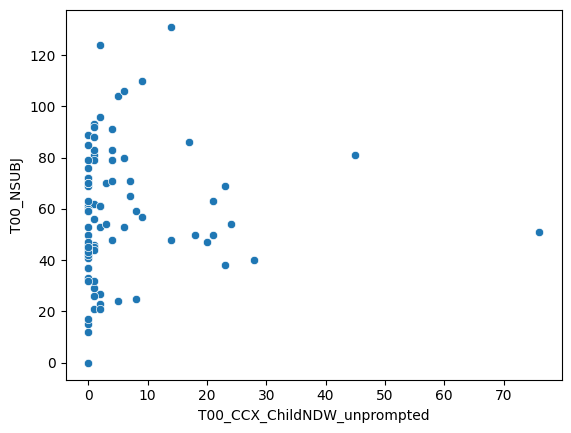

In [38]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

dataset = ALL_DATA
sns.scatterplot(data = ALL_DATA, x='T00_CCX_ChildNDW_unprompted', y='T00_NSUBJ')

import scipy.stats
ALL_DATA = ALL_DATA[ALL_DATA['T00_CCX_ChildNDW_unprompted'].notna()]
x = ALL_DATA["T00_CCX_ChildNDW_unprompted"]
y = ALL_DATA["T00_NSUBJ"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r


r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)


2. What is the correlation between the number of different nominal subjects modeled by caregivers at post-testing and the child's number of different words at follow-up, and by group?

Scatterplot and correlation for RQ2, All Participants

0.35522508754717047
0.000635628076897923


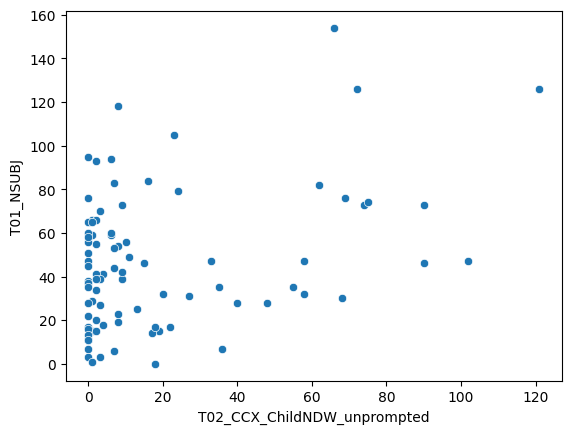

In [39]:
dataset = ALL_DATA
sns.scatterplot(data = ALL_DATA, x='T02_CCX_ChildNDW_unprompted', y='T01_NSUBJ')

import scipy.stats
ALL_DATA = ALL_DATA[ALL_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
x = ALL_DATA["T02_CCX_ChildNDW_unprompted"]
y = ALL_DATA["T01_NSUBJ"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)

Scatterplot and correlation for RQ2, Control Participants

0.3886890310308269
0.007595607224640189


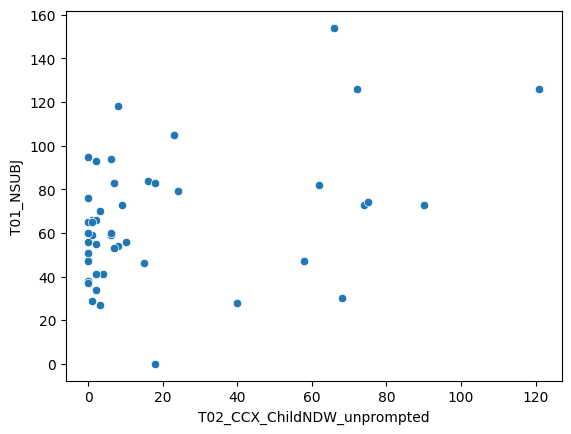

In [40]:
dataset = BAU_DATA
sns.scatterplot(data = BAU_DATA, x='T02_CCX_ChildNDW_unprompted', y='T01_NSUBJ')

BAU_DATA = BAU_DATA[BAU_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
x = BAU_DATA["T02_CCX_ChildNDW_unprompted"]
y = BAU_DATA["T01_NSUBJ"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)

Scatterplot and correlation for RQ2, Treatment Participants

0.4559547103393025
0.001645586277477945


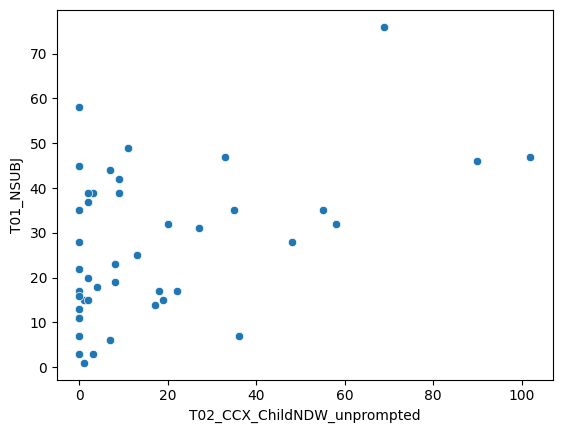

In [41]:
dataset = TX_DATA
sns.scatterplot(data = TX_DATA, x='T02_CCX_ChildNDW_unprompted', y='T01_NSUBJ')

TX_DATA = TX_DATA[TX_DATA['T02_CCX_ChildNDW_unprompted'].notna()]
x = TX_DATA["T02_CCX_ChildNDW_unprompted"]
y = TX_DATA["T01_NSUBJ"]
scipy.stats.pearsonr(x, y)[0]    # Pearson's r

r, p = scipy.stats.pearsonr(x,y)

print(r)
print(p)

3. Is there a significant difference in the number of nominal subjects for the TX and BAU caregiver groups at post-test?

Two Tailed T-test

In [42]:
from scipy.stats import ttest_ind

df = ALL_DATA[['Condition_Number', 'T01_NSUBJ']]

df.head()

group1 = df[df['Condition_Number']==1]
group2 = df[df['Condition_Number'] ==2]
ttest_ind(group1['T01_NSUBJ'], group2['T01_NSUBJ'])

TtestResult(statistic=-7.678555549595043, pvalue=2.216802087078824e-11, df=87.0)

Boxplot of T-Test Results

Note, the boxplots of the t-test results were produced using the generative AI feature of Google Colab [9].

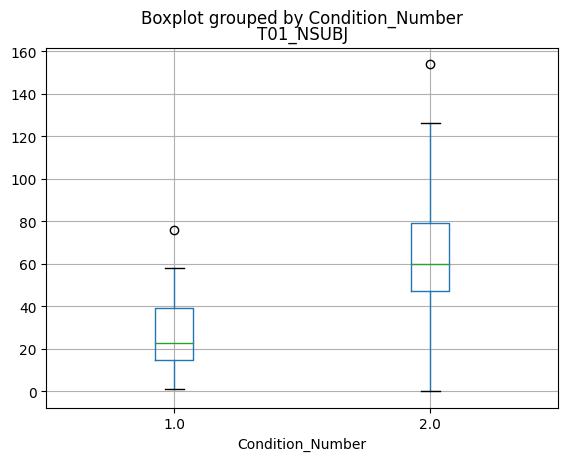

In [43]:
# prompt: make a boxplot of the t test results

import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot(by='Condition_Number', column='T01_NSUBJ')
plt.show()


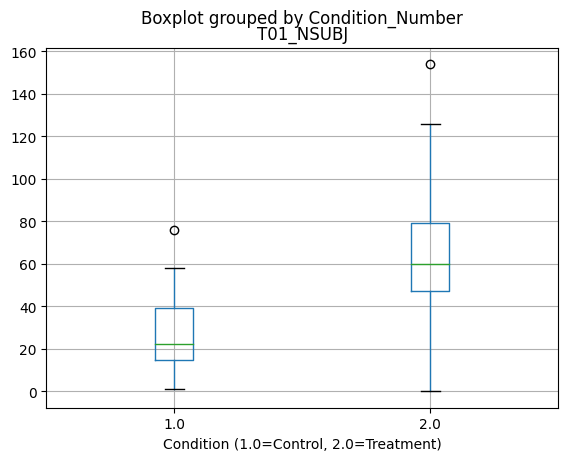

In [44]:
# prompt: On the boxplot label Condition_Number 1.0 with "Control" and Condition_Number 2.0 with "Treatment"

df.boxplot(by='Condition_Number', column='T01_NSUBJ')
plt.xlabel('Condition (1.0=Control, 2.0=Treatment)')
plt.show()


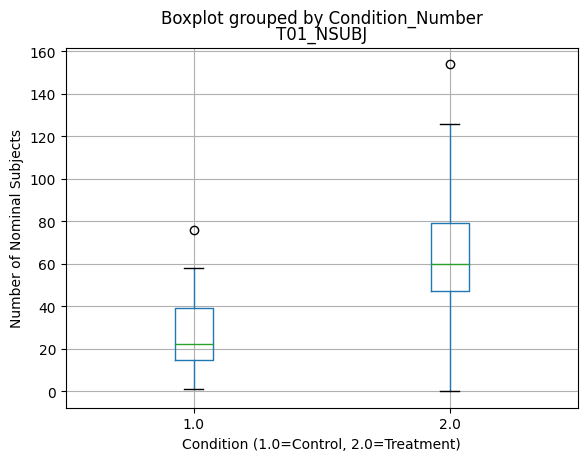

In [45]:
# prompt: On the boxplot label the Y axis with "Number of Nominal Subjects"

df.boxplot(by='Condition_Number', column='T01_NSUBJ')
plt.xlabel('Condition (1.0=Control, 2.0=Treatment)')
plt.ylabel('Number of Nominal Subjects')
plt.show()

# Results and Discussion

In regards to question one, the correlation between the number of nominal subjects modeled by caregivers and the child's number of different unprompted words at baseline was small, and of no signifigance (r = 0.07, p = 0.49).

In regards to question two, the correlation between the number of nominal subjects modeled by caregivers at post-testing and the child's number of different words at follow-up was medium but significant (r = 0.36, p < 0.05). When looking at the same correlation but only for the BAU group, the results were slightly stronger but also medium and significant (r = 0.38, p < 0.5). The strongest correlation between nominal subjects by caregivers at post-testing and the child's number of different words at follow-up was found in the treatment group, but still with only a medium effect (r = 0.47, p < 0.05).

In regards to question three, there was a significant difference in the number of nominal subjects at post-test for the caregivers between treatment and control (t = -7.68, p < 0.05). This indicates that caregivers who were trained used significantly more nominal subjects than caregivers who were not. The histogram of the t-test results was produced using the generative AI feature of Google Colab [9], as was the .html copy of this notebook.

The results of this analysis should be interpreted with caution. Analysis of child baseline data was heavily weighted by the number of children that had zero different unprompted words at baseline. The corpus used for analysis required a large amount of cleaning in an attempt to change the SALT [6] transcription guidelines into a format that could be used validly in SpaCy [5]. A more thorough check of data is advised.

Future research should seek larger samples of children when assessing expressive language delay in low-rate groups such as toddlers with autism. A larger sample would allow for equal binning of the number of different words as an outcome variable. Future research should also explore other predictors of child language growth such as the number of unique nominal subjects [3,4]. By identifying significant predictors of child language growth in the language modeled by their caregivers, we can further refine the training of caregivers and clinicians alike. In turn, the language structures modeled by caregivers and clincians can result in positive expressive language outcomes for their children [2, 3, 4].

# References

[1] ASHA. Typical speech and language development. 2023. https://www.asha.org/public/speech/development/

[2] Roberts, M. Y., Stern, Y. S., Grauzer, J., Nietfeld, J. Thompson, S., Jones, M., Kaat, A. J., Kaiser, A. P. Teaching caregivers to support social communication: Results from a randomized clinical trial of austistic toddlers. American Journal of Speech-Language Pathology. 2022; 32(1)115-127.

[3] Hadley, P., McKenna, M., & Rispoli, M. Sentence diversity in
early language development: Recommendations for target selection and
progress monitoring. American Journal of Speech-Language. 2018; 27:
553-565

[4] Hadley, P. Exploring sentence diversity at the boundary of
typical and impaired language abilities. Journal of Speech,
Language, and Hearing Research. 2020; 63: 3236-3251.

[5] Honnibal, M., & Montani, I. spaCy 2: Natural language understanding with Bloom embeddings, convolutional neural networks and incremental parsing. 2017.

[6] Miller, J. F. Systematic Analysis of Language Transcripts Research V8. Language Analysis Lab, University of Wisconson. 2012.

[7] Aho, A. V., Algorithms for finding patterns in strings, Handbook of theoretical computer science. volume a: algorithms and complexity. MIT Press, Cambridge, MA. 1991.

[8] The pandas development team. Pandas-dev/pandas: Pandas. 2020.

[9] Bisong, E. (2019). Google Colaboratory. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Apress, Berkeley, CA.

[10] Van Rossum, G., Drake, F. L. Python 3 Reference Manual. Scotts Valley, CA: CreateSpace. 2009.

[11] Rodgers, M. E. NLP-Analysis-using-SpaCy---Dependency-Parsing. https://github.com/Mary-E-Rodgers/NLP-Analysis-using-SpaCy---Dependency-Parsing/upload/main

[12] Crossley, S. Safe Divide. Python function. 2023.

[13] Hunter, J. D. Matplotlib: A 2D graphics environment. Computing in Science & Engineering. 2007; 9(3) 90-95.

[14] Waskom, M. L. Seaborn: Statistical data visualization. Journal of Open Source Software. 2021; 6(60) 321.

[15] Virtanen, P., Gommers, R., Oliphant, T. E., Haberland, M., Reddy, T., Cournapeau, D., Burvoski, E., Peterson, P., Weckesser, W., Bright, J., van der Walt, S. J., Brett, M., Wilson, J., Millman, K. J., Mayorov, N., Nelson, A. R. J., Jones, E., Kern, R., Larson, E. ... van Mulbregt, P., and SciPy 1.0 Contributors. SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods. 2020; 3, 261-272.

In [54]:
# prompt: Make a .html copy of Rodgers_FinalProject.ipynb

!jupyter nbconvert Rodgers_FinalProject.ipynb --to html


[NbConvertApp] Converting notebook Rodgers_FinalProject.ipynb to html
[NbConvertApp] Writing 946855 bytes to Rodgers_FinalProject.html
